In [1]:
from helper import get_model_path, load_model_and_tokenizer, get_embedding_matrix


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Llama2 embedding matrix shape: torch.Size([32000, 4096])


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Falcon embedding matrix shape: torch.Size([65024, 4544])


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Mistral embedding matrix shape: torch.Size([32768, 4096])


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


MPT embedding matrix shape: torch.Size([50432, 4096])


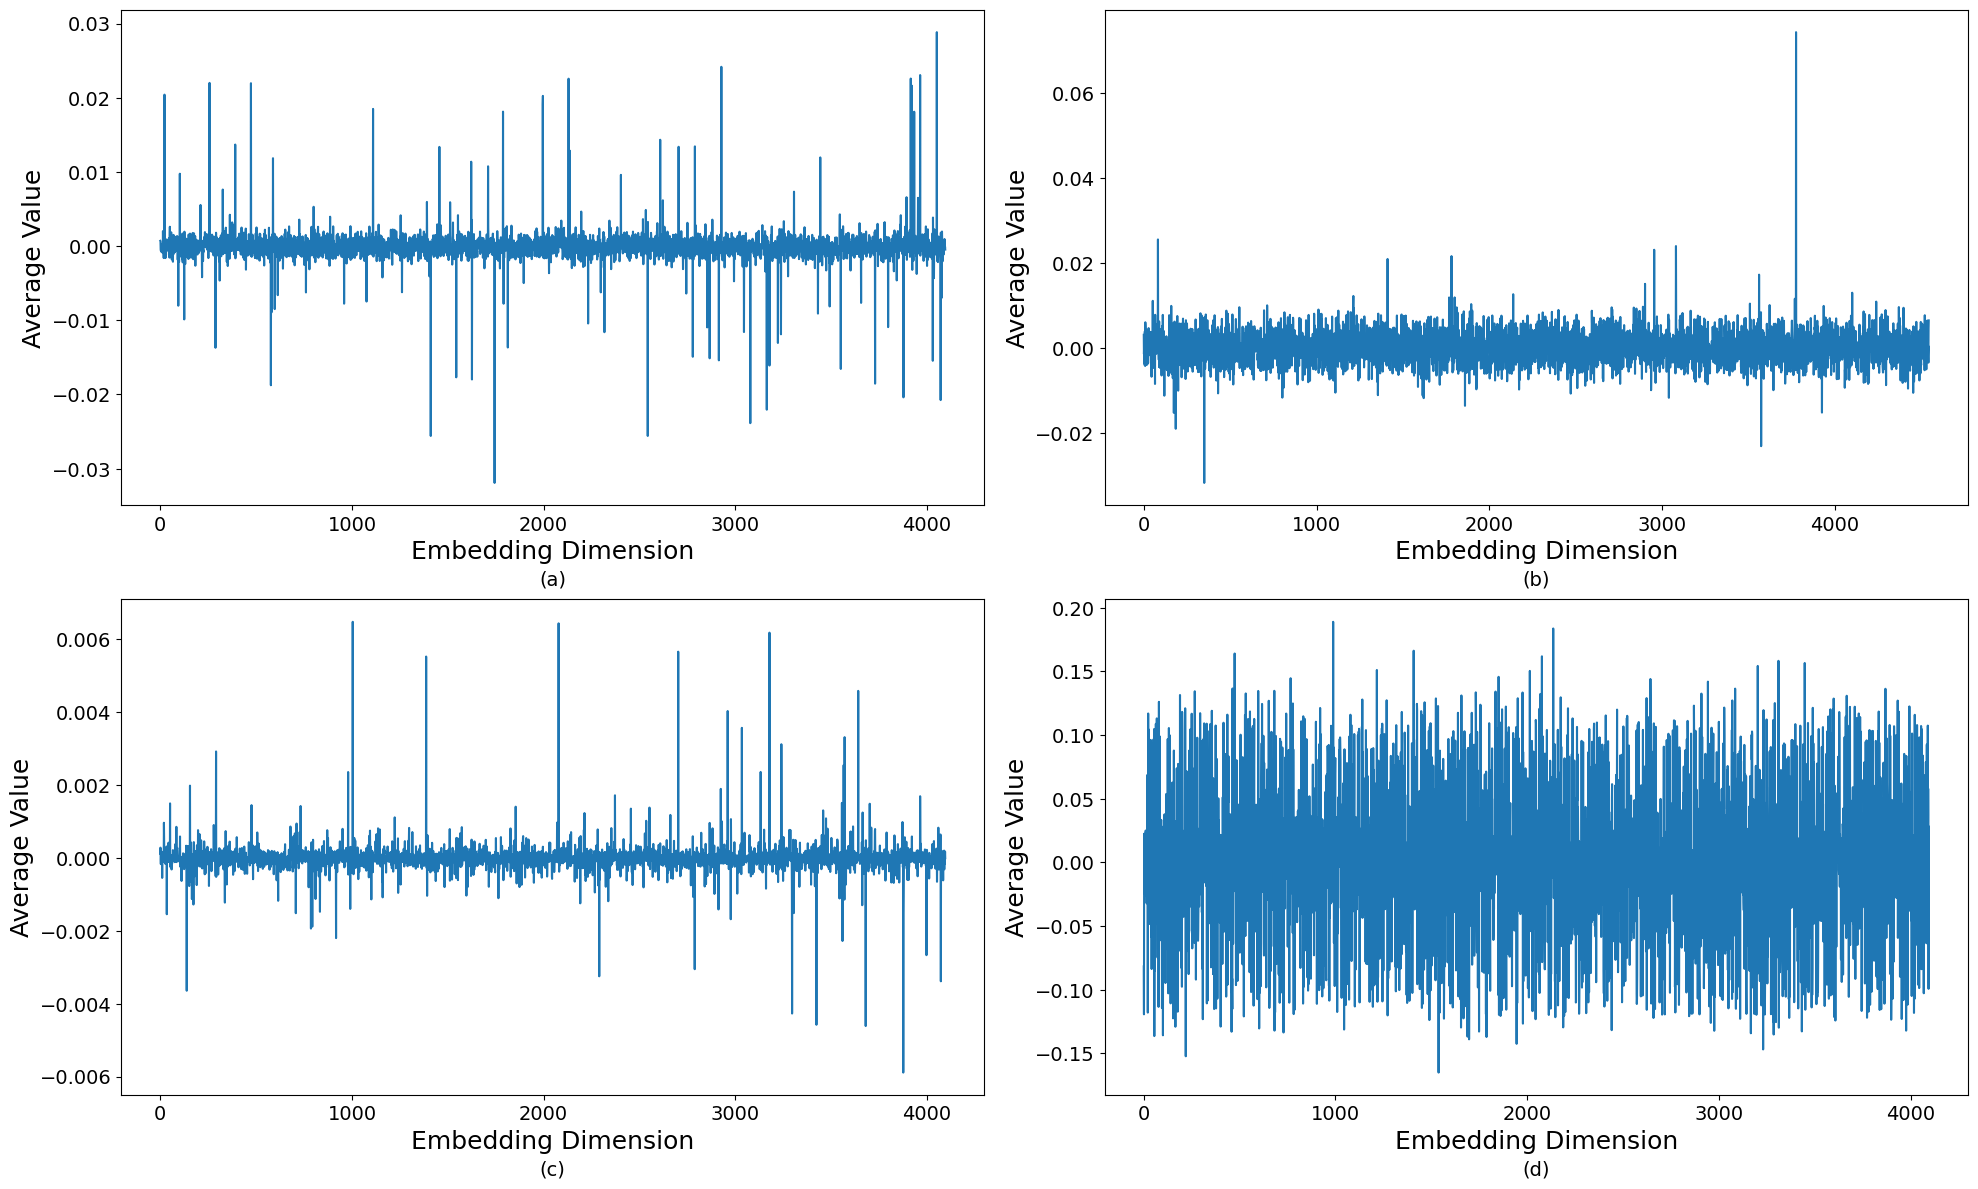

In [2]:
models = ["Llama2", "Falcon", "Mistral", "MPT"]


import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
fig, axes = plt.subplots(2, 2, figsize=(20, 12), sharey=False)

# Define captions for each subplot
captions = ['(a)', '(b)', '(c)', '(d)']
for ax, model_name ,caption in zip(axes.flatten(), models, captions):
    model_path = get_model_path(model_name)
    model, tokenizer = load_model_and_tokenizer(model_path)
    embedding_matrix = get_embedding_matrix(model)
    print(f"{model_name} embedding matrix shape: {embedding_matrix.shape}")
    average_embedding = embedding_matrix.mean(axis=0)
    
    ax.plot(average_embedding.cpu().detach().float().numpy())
    # ax.set_title(f'Average Embedding for {model_name}')
    ax.set_xlabel('Embedding Dimension', fontsize=18)
    ax.set_ylabel('Average Value', fontsize=18)
    ax.text(0.5, -0.15, caption, ha='center', va='center', transform=ax.transAxes)

# Remove the empty subplot if the number of models is less than the number of subplots
if len(models) < len(axes.flatten()):
    fig.delaxes(axes.flatten()[len(models)])

plt.tight_layout()
plt.show()

In [3]:
fig.savefig('embedding_plot.pdf')